In [2]:
import pandas as pd
import numpy as np

Predict the quality of wine (red or white) based on chemical features like acidity, sugar, pH, and sulphates using Random Forest Regression.

In [3]:
df = pd.read_csv("winequalityN.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df["type"].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

Encoding Wine Type

In [6]:
df['type'] = df['type'].apply(lambda x: 1 if x == "red" else 0)

In [7]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Filled missing values in numeric columns with the median

Missing values can break model training   
median used because  
It is robust   
Not affected by outliers   
For continuous numeric data median is a good choice   

In [8]:
df['fixed acidity'] = df['fixed acidity'].fillna(df['fixed acidity'].median())
df['volatile acidity'] = df['volatile acidity'].fillna(df['volatile acidity'].median())
df['citric acid'] = df['citric acid'].fillna(df['citric acid'].median())
df['chlorides'] = df['chlorides'].fillna(df['chlorides'].median())
df['pH'] = df['pH'].fillna(df['pH'].median())
df['sulphates'] = df['sulphates'].fillna(df['sulphates'].median())
df['residual sugar'] = df['residual sugar'].fillna(df['residual sugar'].median())

In [9]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [11]:
df.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.246114,7.216246,0.339630,0.318718,5.443574,0.056039,30.525319,115.744574,0.994697,3.218384,0.531202,10.491801,5.818378
std,0.430779,1.295779,0.164557,0.145231,4.757585,0.035031,17.749400,56.521855,0.002999,0.160637,0.148769,1.192712,0.873255
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,0.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,0.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,0.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Histogram 

Plots histograms for every numeric column   
Helps understand distribution   
Checks skewness, spread, outliers   

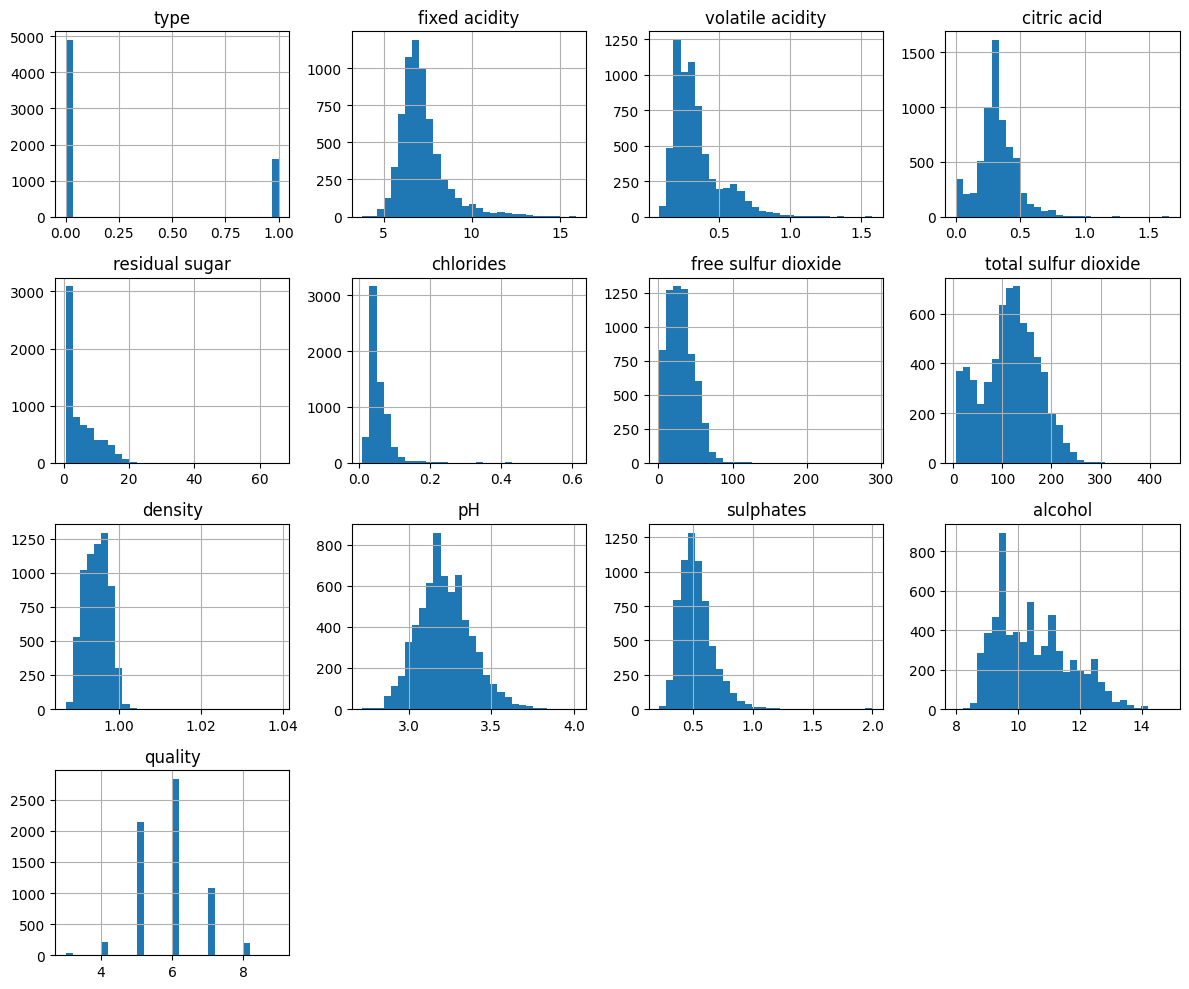

In [14]:
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[numeric_cols].hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()


Bar Chart for Type column (Red=1/White=0)

Shows how many red vs white wines 
Helps understand class imbalance

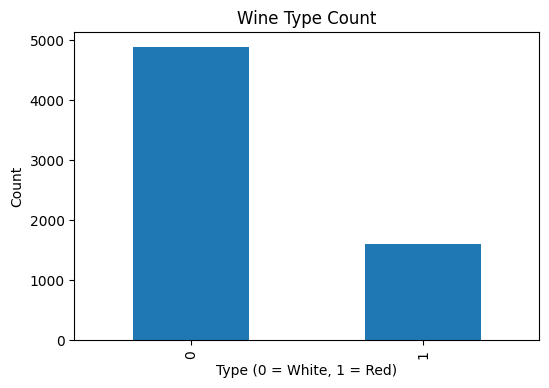

In [15]:
df['type'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title("Wine Type Count")
plt.xlabel("Type (0 = White, 1 = Red)")
plt.ylabel("Count")
plt.show()


In [17]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [30]:
X = df.drop("quality", axis=1)
y = df['quality']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Trained a default Random Forest model to predict wine quality.

In [33]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import r2_score, mean_absolute_error

R2 Score shows how well the model explains the variation in quality.

In [36]:
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.5539301546095193


MAE measures average prediction error.

In [37]:
print("MAE:", mean_absolute_error(y_test, y_pred))

MAE: 0.40716923076923073


Takes a random test sample   
Compares actual vs predicted value   
Helps manually check prediction quality   

In [38]:
sample = X_test.iloc[0:1]
actual_value = y_test.iloc[0]
predicted_value = model.predict(sample)[0]

print("Actual:", actual_value)
print("Predicted:", predicted_value)

Actual: 7
Predicted: 6.94


If prediction error <15% → acceptable    
Simple accuracy threshold

In [39]:
if abs(predicted_value - actual_value) < (0.15 * actual_value):
    print("✔ Model prediction is good (close to real value)")
else:
    print("✘ Model prediction is not accurate")

✔ Model prediction is good (close to real value)


In [55]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
rf = RandomForestRegressor(n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
    }


Tries many combinations of parameters Finds the best-performing model automatically

In [58]:
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=20, cv=5, scoring='r2', n_jobs=-1, random_state=42)

In [59]:
random_search.fit(X_train, y_train)

,estimator,RandomForestR...sor(n_jobs=-1)
,param_distributions,"{'max_depth': [5, 10, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,n_iter,20
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [60]:
best_model = random_search.best_estimator_

In [61]:
y_pred = best_model.predict(X_test)

In [62]:
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.5413990733623745


In [63]:
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))

Mean Absolute Error (MAE): 0.4333786012660477


In [65]:
sample = X_test.iloc[0:1]
actual_value = y_test.iloc[0]

predicted_value = best_model.predict(sample)[0]

print("Actual:", actual_value)
print("Predicted:", predicted_value)

Actual: 7
Predicted: 6.627416139387101


In [66]:
# First default model
y_pred_default = rf.fit(X_train, y_train).predict(X_test)
print("Default RF R2:", r2_score(y_test, y_pred_default))
print("Default RF MAE:", mean_absolute_error(y_test, y_pred_default))

# Best model from RandomizedSearchCV
y_pred_best = best_model.predict(X_test)
print("Tuned RF R2:", r2_score(y_test, y_pred_best))
print("Tuned RF MAE:", mean_absolute_error(y_test, y_pred_best))


Default RF R2: 0.5546754955045939
Default RF MAE: 0.4056461538461539
Tuned RF R2: 0.5413990733623745
Tuned RF MAE: 0.4333786012660476


Tuned model slightly improves accuracy over the default model.

In [ ]:
import joblib

joblib.dump(best_model, "random_forest_best_model.pkl")

['random_forest_best_model.pkl']

In [ ]:
import joblib

joblib.dump(model, "random_forest_model.pkl")

['random_forest_model.pkl']

The final default Random Forest model was saved and deployed, providing consistent and accurate predictions for wine quality. This project demonstrates the effectiveness of Random Forest for regression tasks, even without extensive hyperparameter tuning.